In [71]:
%pip install palmerpenguins


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [72]:
from palmerpenguins import load_penguins
import pandas as pd

In [73]:
df= load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [74]:
df.drop(columns=['island', 'flipper_length_mm', 'flipper_length_mm', 'sex', 'year', 'body_mass_g'], inplace=True)
df.head()

,species,bill_length_mm,bill_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0
3,Adelie,NaN,NaN
4,Adelie,36.7,19.3


In [75]:
df.shape

(344, 3)

In [76]:
df.isna().sum()

species           0
bill_length_mm    2
bill_depth_mm     2
dtype: int64

In [77]:
df['bill_length_mm']= df['bill_length_mm'].fillna(df['bill_length_mm'].mean())
df['bill_depth_mm']= df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean())

print("Null values after filling:")
print(df.isna().sum())

Null values after filling:
species           0
bill_length_mm    0
bill_depth_mm     0
dtype: int64


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X= df.drop(columns=['species'])
y= df['species']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=47)

SVClinear= SVC(kernel='linear', C=100)
SVClinear.fit(X_train, y_train)







SVC(C=100, kernel='linear')

In [79]:
y_pred= SVClinear.predict(X_test)


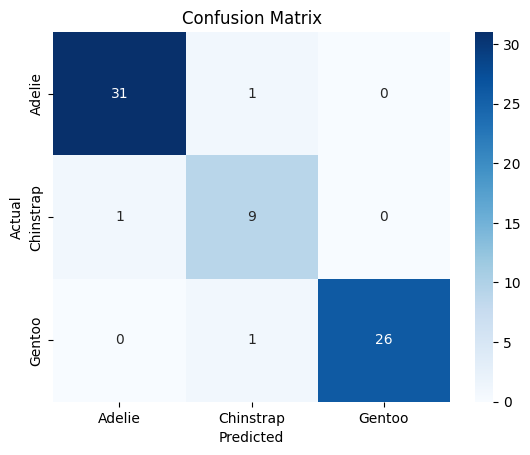

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=SVClinear.classes_, yticklabels=SVClinear.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/Users/rajoad/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


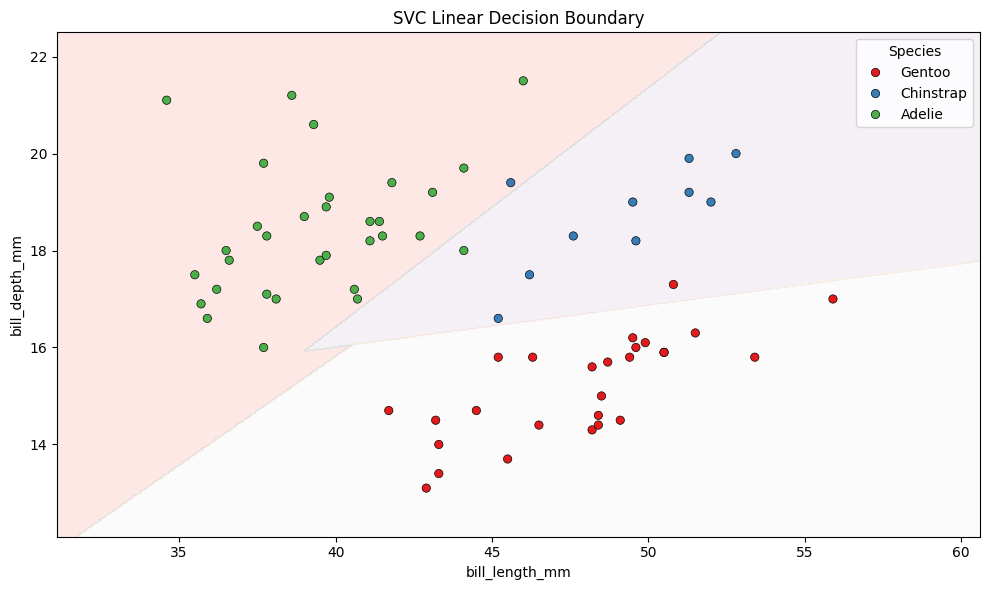

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume SVClinear is trained and uses 2 features
feature1 = X.columns[0]
feature2 = X.columns[1]

# Create meshgrid
x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z_labels = SVClinear.predict(grid)

# Convert class labels to numeric values for contourf
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)  # fit on full y to ensure correct label order
Z = le.transform(Z_labels)  # numeric predictions
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

# Plot test points
sns.scatterplot(x=X_test[feature1], y=X_test[feature2], hue=y_test, edgecolor='k', palette='Set1')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("SVC Linear Decision Boundary")
plt.legend(title='Species')
plt.tight_layout()
plt.show()


What Does C Do?
C is a regularization parameter.
It penalizes misclassification of training examples.
A smaller C encourages a wider margin (simpler model, more regularization).
A larger C aims to classify all training points correctly (less regularization).

Think of It Like This:
C controls how strict the model is about misclassifying training data.
It balances:
Margin maximization: making the margin between classes as wide as possible.
Error minimization: correctly classifying all training examples.

Effect of Different C Values
C Value	Model Behavior	Margin	Overfitting Risk	Tolerance for Misclassification
Small (C=0.01)	More regularized, simpler model	Wide	Low	High — allows more errors
Large (C=100)	Fits training data tightly	Narrow	High	Low — punishes errors heavily

In Your Case: C = 0.01
You are heavily regularizing the model.
The model allows some training points to be on the wrong side of the decision boundary or within the margin.
This might reduce overfitting, especially when your dataset is noisy or not linearly separable.

Visualization Intuition
With small C: You get a softer margin and the model focuses on the overall structure.
With large C: The model tries to classify every point correctly, even at the cost of creating a complicated boundary.
Imagine a line that separates two classes:

If C is small, a few outliers don’t affect the line much.
If C is large, even a single outlier can bend the decision boundary to fit.

In [82]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        32
   Chinstrap       0.82      0.90      0.86        10
      Gentoo       1.00      0.96      0.98        27

    accuracy                           0.96        69
   macro avg       0.93      0.94      0.94        69
weighted avg       0.96      0.96      0.96        69



In [83]:
accuracy = SVClinear.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
print(f"Number of support vectors: {len(SVClinear.support_vectors_)}")


Accuracy: 0.96
Number of support vectors: 28


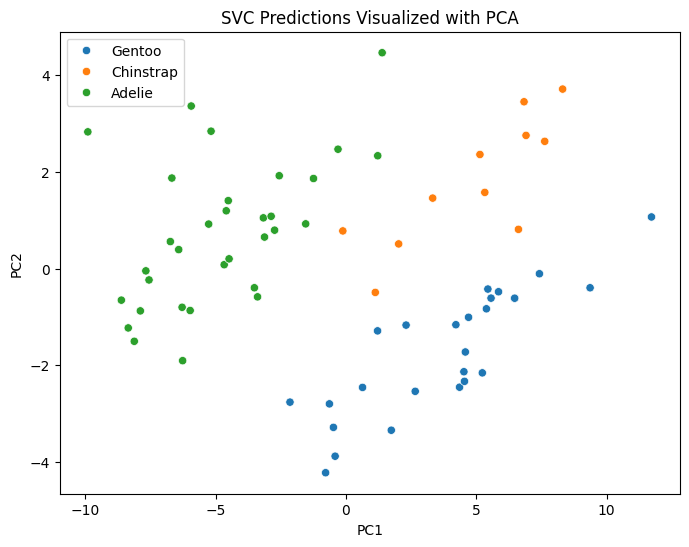

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred)
plt.title("SVC Predictions Visualized with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


What Are Sum Kernels?
Sum kernels are a type of composite kernel in machine learning—especially in kernel methods like Support Vector Machines (SVMs) or Gaussian Processes (GPs). They are created by adding two or more kernel functions together.

🧠 Why Use Sum Kernels?
The idea behind sum kernels is flexibility. By adding kernels, you're combining different ways of measuring similarity between data points. This can help your model better capture complex relationships.

💡 Mathematically:
If you have two kernels, 
K
1
(
x
,
x
′
)
K 
1
​	
 (x,x 
′
 ) and 
K
2
(
x
,
x
′
)
K 
2
​	
 (x,x 
′
 ), then the sum kernel is:

K
sum
(
x
,
x
′
)
=
K
1
(
x
,
x
′
)
+
K
2
(
x
,
x
′
)
K 
sum
​	
 (x,x 
′
 )=K 
1
​	
 (x,x 
′
 )+K 
2
​	
 (x,x 
′
 )
This is still a valid kernel (positive semi-definite) because the sum of valid kernels is also a valid kernel.

✅ Example: Linear + RBF Kernel
You might combine a Linear Kernel and a Radial Basis Function (RBF) kernel:

K
(
x
,
x
′
)
=
x
⊤
x
′
+
exp
⁡
(
−
∥
x
−
x
′
∥
2
2
σ
2
)
K(x,x 
′
 )=x 
⊤
 x 
′
 +exp(− 
2σ 
2
 
∥x−x 
′
 ∥ 
2
 
​	
 )
The linear part captures global trends.
The RBF part captures local, non-linear variations.
This hybrid model is more expressive than either kernel alone.

📊 Applications
SVMs: Better decision boundaries when data has multiple modes or mixed behaviors.
Gaussian Processes: Modeling additive structure in time series or spatial data (e.g., trend + seasonality).
Bayesian Optimization: To express prior beliefs about different sources of variability.
🧪 Visual Intuition
Imagine:

One kernel models overall trend (e.g., linear).
Another kernel captures wiggles (e.g., periodic or RBF).
The sum kernel captures both simultaneously.
🔧 In Code (scikit-learn style for SVMs):
from sklearn.svm import SVC
from sklearn.metrics.pairwise import linear_kernel, rbf_kernel

def sum_kernel(X, Y):
    return linear_kernel(X, Y) + rbf_kernel(X, Y, gamma=0.5)

model = SVC(kernel=sum_kernel)
model.fit(X_train, y_train)
🧩 Summary
Feature	Description
What	A kernel formed by adding multiple kernels
Why	To capture diverse patterns in data
Use Case	SVMs, GPs, kernel ridge regression, Bayesian optimization
Benefit	Greater flexibility and model expressiveness
Let me know if you'd like visual plots of sum kernels in action or want to try combining custom kernels.

In [86]:
df_full= load_penguins()
df_full.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


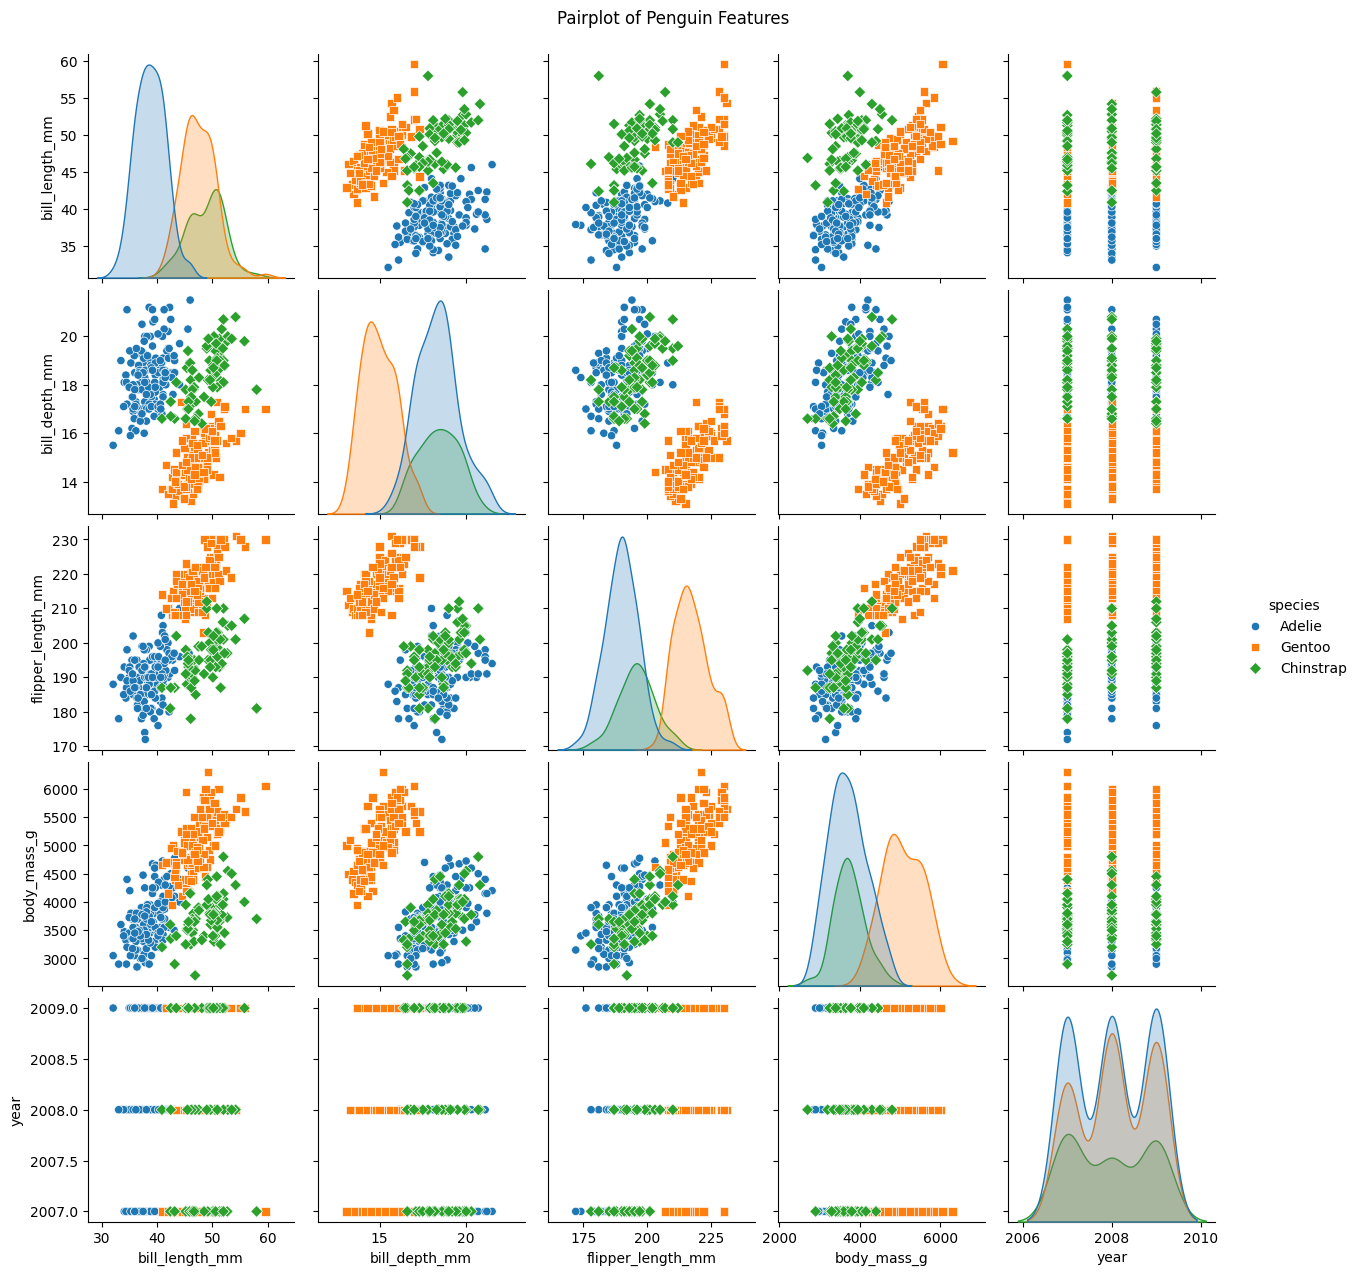

In [87]:
pairplot = sns.pairplot(df_full, hue='species', diag_kind='kde', markers=["o", "s", "D"])
pairplot.fig.suptitle("Pairplot of Penguin Features", y=1.02)
plt.show()

In [138]:
X= df.drop(columns=['species'])
y= df['species']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=7)

svm_poly= SVC(kernel='poly', degree=4, C=0.01)
svm_poly.fit(X_train, y_train)



SVC(C=0.01, degree=4, kernel='poly')

In [139]:
y_pred_poly= svm_poly.predict(X_test)


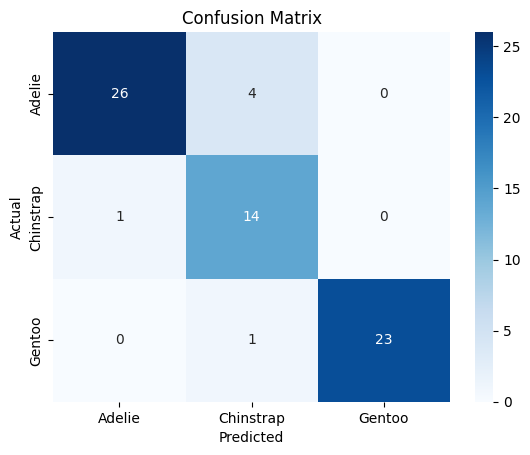

In [140]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_poly= confusion_matrix(y_test, y_pred_poly)
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Blues', xticklabels=svm_poly.classes_, yticklabels=svm_poly.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [141]:
accuracy = svm_poly.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
print(f"Number of support vectors: {len(svm_poly.support_vectors_)}")

Accuracy: 0.91
Number of support vectors: 70


/Users/rajoad/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


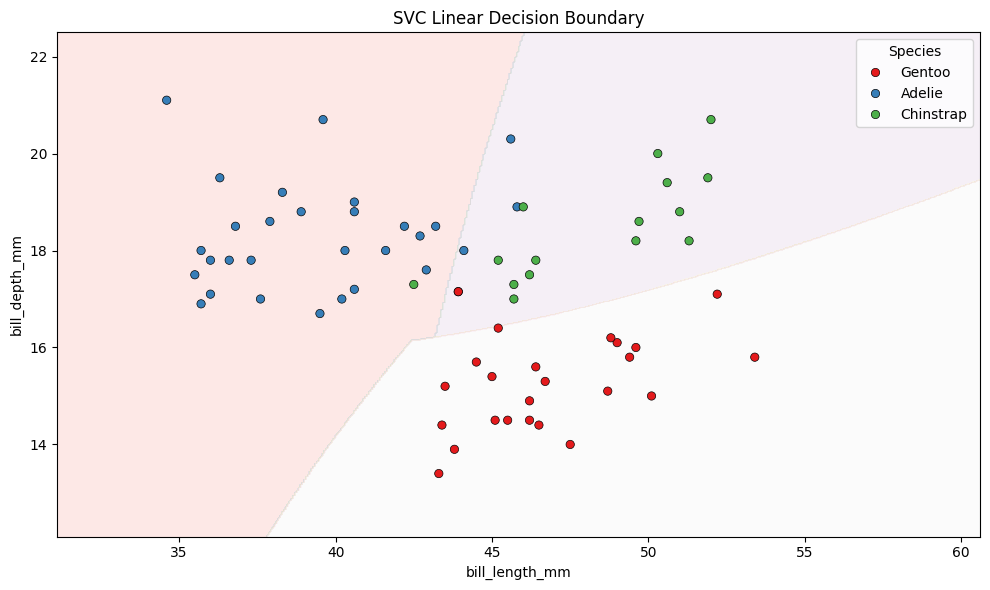

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume SVClinear is trained and uses 2 features
feature1 = X.columns[0]
feature2 = X.columns[1]

# Create meshgrid
x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z_labels = svm_poly.predict(grid)

# Convert class labels to numeric values for contourf
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)  # fit on full y to ensure correct label order
Z = le.transform(Z_labels)  # numeric predictions
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

# Plot test points
sns.scatterplot(x=X_test[feature1], y=X_test[feature2], hue=y_test, edgecolor='k', palette='Set1')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("SVC Linear Decision Boundary")
plt.legend(title='Species')
plt.tight_layout()
plt.show()


What degree Controls:
It increases the capacity of the model to capture complex interactions among features.
Higher degrees allow modeling more complex (nonlinear) boundaries between classes.
For example:

degree = 1: behaves like a linear kernel.
degree = 2: includes quadratic interactions (e.g., 
x
1
2
,
x
1
x
2
x 
1
2
​	
 ,x 
1
​	
 x 
2
​	
 ).
degree = 3: includes cubic terms and interactions.

Intuition:
Suppose you're classifying data that lies in a circle or spiral. A linear kernel would fail. A polynomial kernel with:

degree = 2 might form circular boundaries (ellipses).
degree = 3+ can twist and curve to fit more complicated regions.
But:

Too high a degree → your model fits the noise (overfitting).
Too low → it may miss key nonlinear relationships (underfitting).



In [147]:
X= df.drop(columns=['species'])
y= df['species']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=47)

svm_rbf= SVC(kernel='rbf', C=0.01, gamma='scale')
svm_rbf.fit(X_train, y_train)



SVC(C=0.01)

In [148]:
y_pred_rbf= svm_rbf.predict(X_test)
accuracy = svm_rbf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
print(f"Number of support vectors: {len(svm_rbf.support_vectors_)}")    

Accuracy: 0.46
Number of support vectors: 252


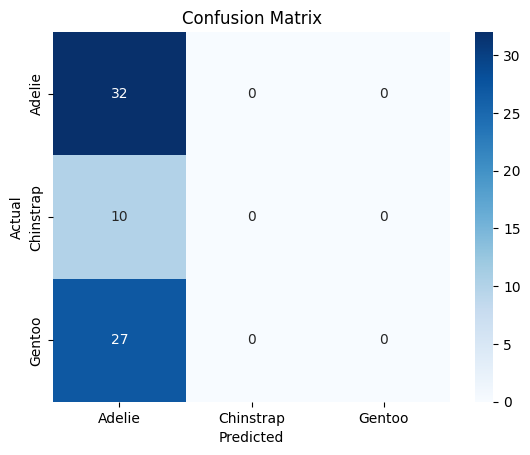

In [149]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rbf= confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues', xticklabels=svm_poly.classes_, yticklabels=svm_poly.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
